# Example4 - Multisetup with Pre Global Estimation Re-scaling (PreGER) method

In this example, we'll be working with a simulated dataset generated from a finite element model of a fictitious three-story, L-shaped building. This model was created using OpenSeesPy, and the corresponding Python script can be found [here](https://github.com/dagghe/pyOMA-test-data/blob/main/test_data/3SL/model.py). 

As always, first we import the necessary modules. All the files needed to run this example are available [here](https://github.com/dagghe/pyOMA-test-data/tree/main/test_data/3SL).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms import SSI_MS
from pyoma2.setup import MultiSetup_PreGER
from pyoma2.support.utils.sample_data import get_sample_data

For the **preGER** merging procedure, we adopt a strategy similar to that used for the single setup class. The first step involves instantiating the ```MultiSetup_PreGER``` class and passing the list of datasets, the lists of reference sensors, and their sampling frequency. Similarly to the single setup class, also for the ```MultiSetup_PreGER``` we have access to a wide set of tools to pre-process the data and get more information regarding its quality (e.g. ```decimate_data()```, ```filter_data()```, ```plot_ch_info()``` methods).

2025-06-04 12:40:47,135 - pyoma2.support.utils.sample_data - INFO - set1.npy already exists locally. (sample_data:49)
2025-06-04 12:40:47,138 - pyoma2.support.utils.sample_data - INFO - set2.npy already exists locally. (sample_data:49)
2025-06-04 12:40:47,142 - pyoma2.support.utils.sample_data - INFO - set3.npy already exists locally. (sample_data:49)


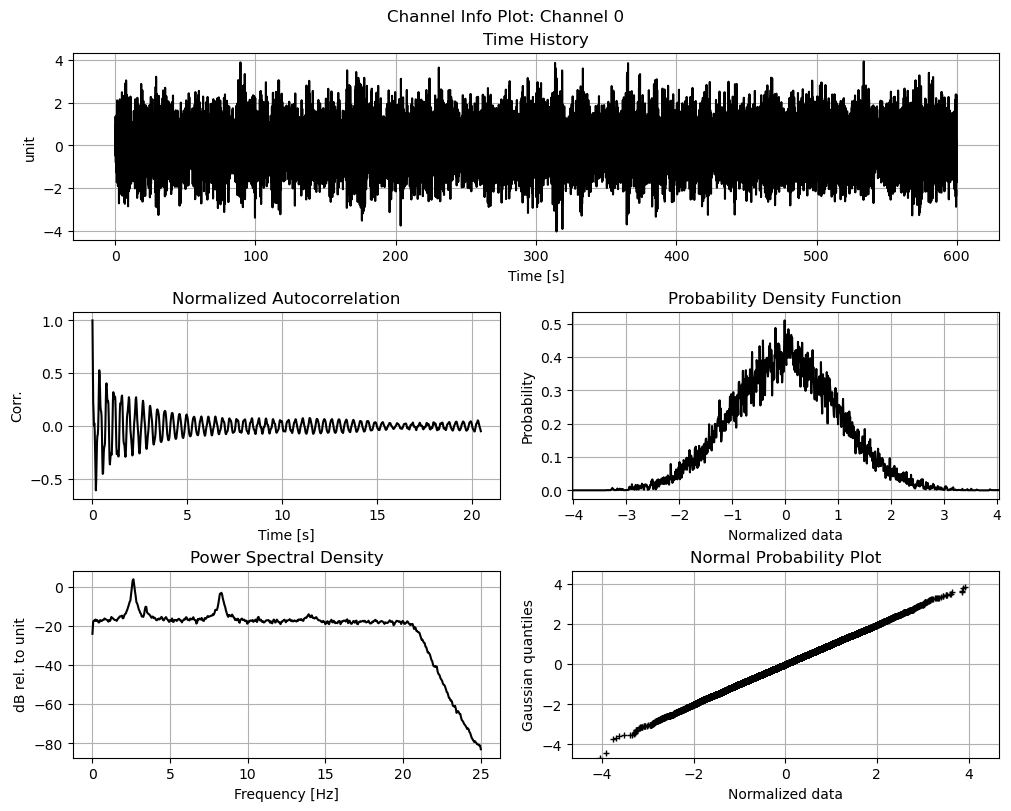

In [2]:
# import data files
set1 = np.load(get_sample_data(filename="set1.npy", folder="3SL"), allow_pickle=True)
set2 = np.load(get_sample_data(filename="set2.npy", folder="3SL"), allow_pickle=True)
set3 = np.load(get_sample_data(filename="set3.npy", folder="3SL"), allow_pickle=True)

# list of datasets and reference indices
data = [set1, set2, set3]
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]

# Create multisetup
msp = MultiSetup_PreGER(fs=100, ref_ind=ref_ind, datasets=data)

# decimate data
msp.decimate_data(q=2)

# Plot TH, PSD and KDE of the (selected) channels of the (selected) datasets
_, _ = msp.plot_ch_info(data_idx=[1], ch_idx=[2])

Again if we want to be able to plot the mode shapes later, then we need to define the geometry of the structure. 

In [3]:
# Geometry 1
_geo1 = get_sample_data(filename="Geo1.xlsx", folder="3SL")
# Geometry 2
_geo2 = get_sample_data(filename="Geo2.xlsx", folder="3SL")

# Define geometry1
msp.def_geo1_by_file(_geo1)
# Define geometry 2
msp.def_geo2_by_file(_geo2)

2025-06-04 12:40:47,594 - pyoma2.support.utils.sample_data - INFO - Downloading Geo1.xlsx from GitHub... (sample_data:38)
2025-06-04 12:40:48,030 - pyoma2.support.utils.sample_data - INFO - Downloaded Geo1.xlsx successfully. (sample_data:47)
2025-06-04 12:40:48,031 - pyoma2.support.utils.sample_data - INFO - Downloading Geo2.xlsx from GitHub... (sample_data:38)
2025-06-04 12:40:48,252 - pyoma2.support.utils.sample_data - INFO - Downloaded Geo2.xlsx successfully. (sample_data:47)


Now we need to instantiate the multi-setup versions of the algorithms we wish to execute, such as SSIdat.

2025-06-04 12:40:48,386 - pyoma2.setup.base - INFO - Running SSIdat... (base:123)
  0%|          | 0/3 [00:00<?, ?it/s]2025-06-04 12:40:48,453 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:88)
2025-06-04 12:40:48,528 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:88)
100%|██████████| 81/81 [00:00<00:00, 24084.69it/s]
2025-06-04 12:40:48,649 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:626)
100%|██████████| 81/81 [00:00<00:00, 825.25it/s]
2025-06-04 12:40:48,950 - pyoma2.setup.base - INFO - all done (base:102)


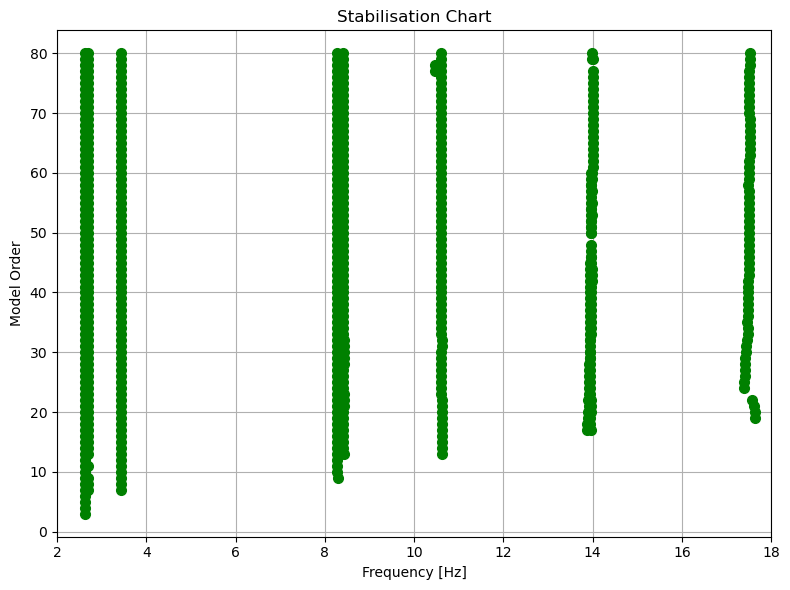

In [4]:
# Initialise the algorithms
ssidat = SSI_MS(name="SSIdat", method="cov", br=40, ordmax=80)

# Add algorithms to the class
msp.add_algorithms(ssidat)
msp.run_all()

# Plot
_, _ = ssidat.plot_stab(freqlim=(2,18))

After the algorithms have been executed we can exctract the desired poles and plot the mode shapes.

2025-06-04 12:40:49,013 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIdat (base:149)
2025-06-04 12:40:49,014 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1034)
100%|██████████| 9/9 [00:00<00:00, 33704.23it/s]


Widget(value='<iframe src="http://localhost:50430/index.html?ui=P_0x16a8e3680_0&reconnect=auto" class="pyvista…

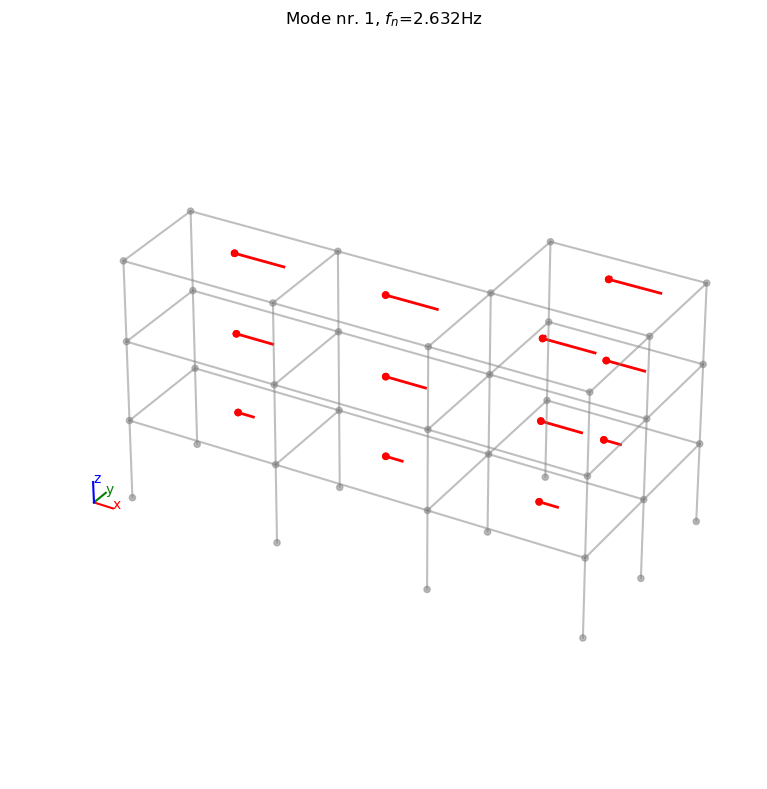

In [5]:
# get modal parameters
msp.mpe(
    "SSIdat",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order_in=80)

# plot mode shapes
_, _ = msp.plot_mode_geo1(algo_res=ssidat.result, mode_nr=1, view="3D", scaleF=2)
_ = msp.plot_mode_geo2(algo_res=ssidat.result, mode_nr=6, scaleF=2, notebook=True)

In [6]:
ssidat.result.Fn

array([ 2.63173197,  2.69169829,  3.42489449,  8.27456318,  8.40236039,
       10.59591519, 13.99251317, 14.02336271, 17.52236184])